In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import optimizers
import keras.utils as ker
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, InputLayer, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

Using TensorFlow backend.


In [2]:
## Read data from csv file 'student-mat.csv'
math_data = pd.read_csv('encoded_math_data.csv')

In [3]:
## Encoding Schools 
list_of_schools = []
for i in math_data['school']:
    if i == 'GP':
        school = 1
    else:
        school = 0
    list_of_schools.append(school)

math_data['school'] = list_of_schools

In [4]:
## One-hot encoding binary variables. 
school_one_hot = ker.to_categorical(math_data['school']).tolist()
sex_one_hot = ker.to_categorical(math_data['sex']).tolist()
address_one_hot = ker.to_categorical(math_data['address']).tolist()
pstatus_one_hot = ker.to_categorical(math_data['Pstatus']).tolist()
fedu_one_hot = ker.to_categorical(math_data['Fedu']).tolist()
medu_one_hot = ker.to_categorical(math_data['Medu']).tolist()
schoolsup_one_hot = ker.to_categorical(math_data['schoolsup']).tolist()
famsup_one_hot = ker.to_categorical(math_data['famsup']).tolist()
paid_one_hot = ker.to_categorical(math_data['paid']).tolist()
activities_one_hot = ker.to_categorical(math_data['activities']).tolist()
nursery_one_hot = ker.to_categorical(math_data['nursery']).tolist()
higher_one_hot = ker.to_categorical(math_data['higher']).tolist()
internet_one_hot = ker.to_categorical(math_data['internet']).tolist()
romantic_one_hot = ker.to_categorical(math_data['romantic']).tolist()

## Adding one-hot vectors to df
math_data['school_one_hot'] = school_one_hot
math_data['sex_one_hot'] = sex_one_hot
math_data['address_one_hot'] = address_one_hot
math_data['pstatus_one_hot'] = pstatus_one_hot
math_data['fedu_one_hot'] = fedu_one_hot
math_data['medu_one_hot'] = medu_one_hot
math_data['schoolsup_one_hot'] = schoolsup_one_hot
math_data['famsup_one_hot'] = famsup_one_hot
math_data['paid_one_hot'] = paid_one_hot
math_data['activities_one_hot'] = activities_one_hot
math_data['nursery_one_hot'] = nursery_one_hot
math_data['higher_one_hot'] = higher_one_hot
math_data['internet_one_hot'] = internet_one_hot
math_data['romantic_one_hot'] = romantic_one_hot

In [5]:
# Creating a new binary variable - 1 if student failed first grading period
previous_grade_list = []
for i in math_data['M1']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    previous_grade_list.append(label)
math_data['previous_pass_fail'] = previous_grade_list

In [6]:
## Creating labels - Pass(0) or Fail(1)
list_of_labels = []
for i in math_data['M3']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    list_of_labels.append(label)
math_data['label'] = list_of_labels

In [7]:
math_data['label'].value_counts()

0    265
1    130
Name: label, dtype: int64

In [8]:
## Upsample the minority class to deal with the skewed dataset. 
math_data_maj = math_data[math_data['label']==0]
math_data_min = math_data[math_data['label']==1]
math_data_min_upsampled = resample(math_data_min, replace=True, n_samples=265)    
math_data_balanced = pd.concat([math_data_maj, math_data_min_upsampled])
math_data_balanced['label'].value_counts()

1    265
0    265
Name: label, dtype: int64

In [9]:
math_data_balanced = math_data_balanced.reset_index(drop=True)

In [10]:
balanced_math_data = math_data_balanced.drop(math_data_balanced.columns[[0]], axis=1)

In [11]:
## Creating input vector (X)
X = []
for i in range(0, len(balanced_math_data)):
    x = []
#    x.append(balanced_math_data['age'][i])
    x.append(balanced_math_data['Medu'][i])
    x.append(balanced_math_data['Fedu'][i])
#    x.append(balanced_math_data['both_parents_college'][i])
#    x.append(balanced_math_data['studytime'][i])
#    x.append(balanced_math_data['famrel'][i])
#    x.append(balanced_math_data['freetime'][i])
    x.append(balanced_math_data['goout'][i])
    x.append(balanced_math_data['Dalc'][i])
    x.append(balanced_math_data['Walc'][i])
#    x.append(balanced_math_data['health'][i])
#    x.append(balanced_math_data['m_absences'][i])
    x.append(balanced_math_data['failures'][i])
    
#    x.extend(balanced_math_data['sex_one_hot'][i])
#    x.extend(balanced_math_data['address_one_hot'][i])
#    x.extend(balanced_math_data['pstatus_one_hot'][i])
#    x.extend(balanced_math_data['schoolsup_one_hot'][i])
#    x.extend(balanced_math_data['famsup_one_hot'][i])
    x.extend(balanced_math_data['paid_one_hot'][i])
#    x.extend(balanced_math_data['activities_one_hot'][i])
#    x.extend(balanced_math_data['nursery_one_hot'][i])
#    x.extend(balanced_math_data['school_one_hot'][i])
    x.extend(balanced_math_data['higher_one_hot'][i])
    x.extend(balanced_math_data['internet_one_hot'][i])
    x.extend(balanced_math_data['romantic_one_hot'][i])
    x.append(balanced_math_data['previous_pass_fail'][i])
    x.append(balanced_math_data['M1'][i])
    X.append(x)

In [12]:
Y = np.array(balanced_math_data['label'])
X = np.array(X)

In [47]:
## split dataset into train-test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

In [14]:
X.shape[1:]

(16,)

In [15]:
X_train[0]

array([ 3.,  2.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  0., 14.])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Apply a constraint manually following the optimizer update step.
Train on 317 samples, validate on 80 samples
Epoch 1/36
317/317 [==============================] - 1s 2ms/sample - 

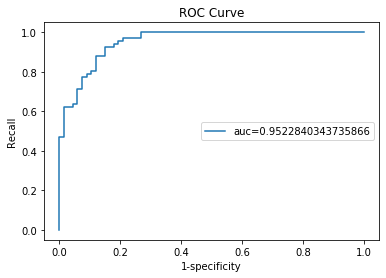

In [16]:
## DNN model utilizing TF's Keras API
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy')
model.summary()
model.fit(X_train, y_train, epochs=36, batch_size=1, validation_split=0.2)
Y_pred = model.predict_classes(X_test)

## Metrics - 
print('\nPrecision score: {:.4f}'.format(precision_score(y_test, Y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, Y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, Y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, Y_pred)))

print('\nClassification accuracy report:')
print(classification_report(y_test, Y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, Y_pred))

## Creating an ROC/AUC curve to visualize performance. 
classification_probs = model.predict_proba(X_test)
classification_AUC = roc_auc_score(y_test, classification_probs)  
print("\nAUC Index: {:.3f}".format(classification_AUC))
fpr, tpr, threshold = roc_curve(y_test,  classification_probs)
plt.plot(fpr,tpr,label="auc="+str(classification_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Best Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

Precision score: 0.8049
Recall score: 0.9851
Accuracy score: 0.8722
F1 score: 0.8859

AUC Index: 0.8713251922207146


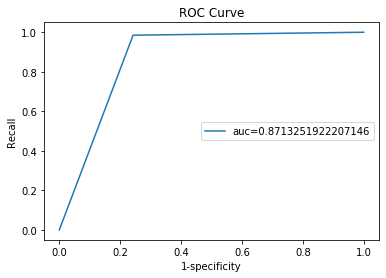

In [27]:
## Tuning hyperparameters of tree - cross-validated grid-search over a parameter grid.
optimized_tree = DecisionTreeClassifier()
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_tree = GridSearchCV(optimized_tree, params, cv=5) ##  folds in stratified k-fold. 
opt_tree.fit(X_train,y_train)
print("Best Parameters:", opt_tree.best_params_)

## Grid Search Tree Metrics
grid_tree_y_pred = opt_tree.predict(X_test)
grid_tree_probs = opt_tree.predict_proba(X_test)
grid_tree_AUC = roc_auc_score(y_test, grid_tree_probs[:, 1])  ## Probability here just like lecture notes.

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

print("\nAUC Index:", grid_tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_tree_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show() 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'max_depth': 8, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Precision score: 0.7733
Recall score: 0.8788
Accuracy score: 0.8120
F1 score: 0.8227

AUC Index: 0.8772048846675712


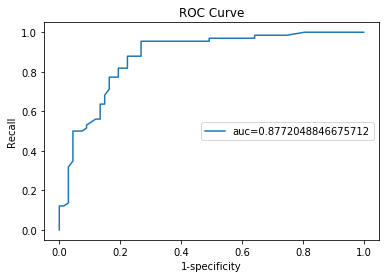

In [38]:
## Random Forest - cross-validated grid-search over a parameter grid.
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True)
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_rf = GridSearchCV(rf, params)
opt_rf.fit(X_train,y_train)
print("Best Parameters:", opt_rf.best_params_)

rf_y_pred = opt_rf.predict(X_test)
rf_probs = opt_rf.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

rf_AUC = roc_auc_score(y_test, rf_probs[:, 1])  
print("\nAUC Index:", rf_AUC)
fpr, tpr, threshold = roc_curve(y_test,  rf_probs[:, 1])  
plt.plot(fpr,tpr,label="auc="+str(rf_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.8308
Recall score: 0.8182
Accuracy score: 0.8271
F1 score: 0.8244

AUC Index: 0.9122568973315243


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


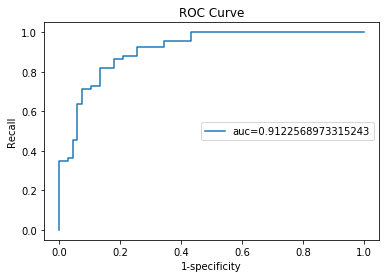

In [48]:
## Logistic Regression
log_regression = LogisticRegression().fit(X_train, y_train)
logistic_y_pred = log_regression.predict(X_test)
log_probs = log_regression.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,logistic_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,logistic_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,logistic_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,logistic_y_pred)))

log_AUC = roc_auc_score(y_test, log_probs[:, 1])
print("\nAUC Index:", log_AUC)
fpr, tpr, threshold = roc_curve(y_test,  log_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(log_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()